Evaluation k_means_iris_8: 30.337771548626833
Evaluation k_means_iris_3: 78.851441426146
Evaluation k_means_iris_bad_init: 142.7540625000001


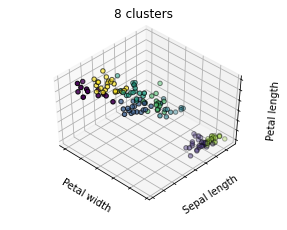

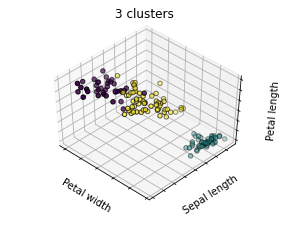

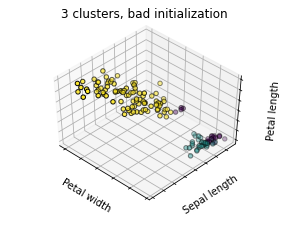

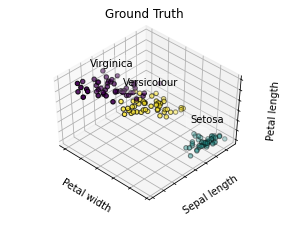

In [1]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

# Though the following import is not directly being used, it is required
# for 3D projection to work with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(4)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [
    ("k_means_iris_8", KMeans(n_clusters=8)),
    ("k_means_iris_3", KMeans(n_clusters=3)),
    ("k_means_iris_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]

fignum = 1
titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization"]
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
    ax.set_position([0, 0, 0.95, 1])
    est.fit(X)
    labels = est.labels_
    print('Evaluation '+name+': '+str(est.inertia_))

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float), edgecolor="k")

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel("Petal width")
    ax.set_ylabel("Sepal length")
    ax.set_zlabel("Petal length")
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 3].mean(),
        X[y == label, 0].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor="k")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.set_title("Ground Truth")
ax.dist = 12

fig.show()

# To scale or NOT to scale:

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
scaler = StandardScaler()

In [4]:
from sklearn.pipeline import make_pipeline

In [5]:
import pandas as pd

In [6]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans = KMeans(n_clusters=3)

In [9]:
#pipeline = make_pipeline(scaler, kmeans)
pipeline = make_pipeline(kmeans)

In [10]:
pipeline.fit(X)

Pipeline(steps=[('kmeans', KMeans(n_clusters=3))])

In [11]:
labels = pipeline.predict(X)

In [12]:
df = pd.DataFrame({'labels': labels, 'varieties': y})

In [13]:
ct = pd.crosstab(df['labels'], df['varieties'])
ct

varieties,0,1,2
labels,,,
0,0,48,14
1,50,0,0
2,0,2,36
